In [3]:
using Roots,Plots,ForwardDiff,LinearAlgebra,Statistics,Measures,DataFrames,CSV,Symbolics

### Task A - Finding roots using Bisection, Newton and Steffenson method

#### Task A1 - test methods

In [32]:
f1(x) = sin(x) - x/2 
f2(x) = 2 * x - exp(- x)
f3(x) = (x+3)*(x-1)^2
f4(x) = 20.0 * x / ( 100.0 * x * x + 1.0 )#the Repeller
f5(x) = x * exp(-x)
f6(x) = cos(x) - x

functions = Function[]
push!(functions,f1)
push!(functions,f2)
push!(functions,f3)
push!(functions,f4)
push!(functions,f5)
push!(functions,f6);

In [37]:
df = DataFrame(Function=Function[], Method=Function[], Iters=Int64[], Calls=Int64[], root_x = Float64[], root_y = Float64[])
tracker = Roots.Tracks() 
Df(f) = x->ForwardDiff.derivative(f, float(x))

bisection(f) = find_zero(f, (0, 1), Bisection(), tracks = tracker) 
newton(f) = find_zero((f, Df(f)),0, Roots.Newton(),tracks = tracker)
steffenson(f) = find_zero(f, 0, Order2(),tracks = tracker);

In [38]:
for f in functions
    result_b = bisection(f) 
    push!(df,(f,bisection,tracker.steps,tracker.fncalls, result_b, f(result_b)))

    result_n = newton(f)
    push!(df,(f,newton,tracker.steps,tracker.fncalls, result_n, f(result_n)))

    result_s = steffenson(f)
    push!(df,(f,steffenson,tracker.steps,tracker.fncalls, result_s, f(result_s)))
end

df

Row,Function,Method,Iters,Calls,root_x,root_y
,Function,Function,Int64,Int64,Float64,Float64
1,f1,bisection,0,3,0.0,0.0
2,f1,newton,1,5,0.0,0.0
3,f1,steffenson,1,7,0.0,0.0
4,f2,bisection,62,71,0.351734,0.0
5,f2,newton,66,79,0.351734,-1.11022e-16
6,f2,steffenson,71,88,0.351734,0.0
7,f3,bisection,71,91,1.0,0.0
8,f3,newton,97,143,1.0,4.56496e-16
9,f3,steffenson,125,193,1.0,5.48319e-16


#### Task A2 - difficult function

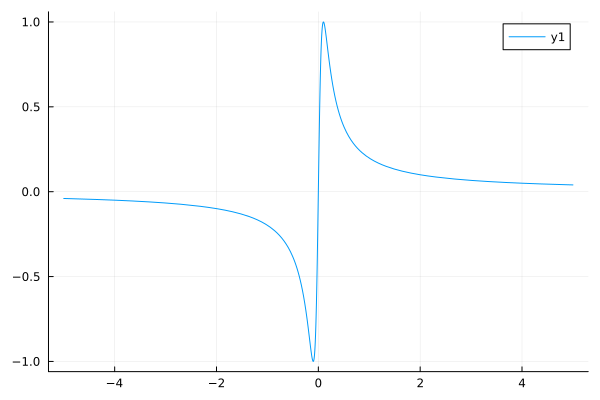

In [4]:
f(x) = 20.0 * x / ( 100.0 * x * x + 1.0 )#Repeller
plot(f)

In [42]:
df = DataFrame(Function=Function[], Method=Function[], Iters=Int64[], Calls=Int64[], root_x = Float64[], root_y = Float64[])
result_b = bisection(f) 
push!(df,(repeller,bisection,tracker.steps,tracker.fncalls, result_b, f(result_b)))

result_n = newton(f)
push!(df,(repeller,newton,tracker.steps,tracker.fncalls, result_n, f(result_n)))

result_s = steffenson(f)
push!(df,(repeller,steffenson,tracker.steps,tracker.fncalls, result_s, f(result_s)))

Row,Function,Method,Iters,Calls,root_x,root_y
,Function,Function,Int64,Int64,Float64,Float64
1,repeller,bisection,199,300,0.0,0.0
2,repeller,newton,200,302,0.0,0.0
3,repeller,steffenson,200,304,0.0,0.0


#### Task A3 - cases which do not work

##### Bisection

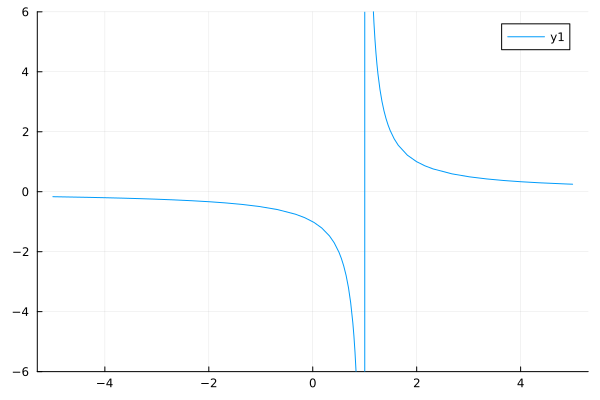

In [59]:
f(x) = x/(x-1) - 1
xs = -5:5
plot(f, ylim = (-6,6))

In [60]:
result = find_zero(f,(-1,1),Bisection())
f(result)

-9.007199254740992e15

Function is not continous

##### Newton

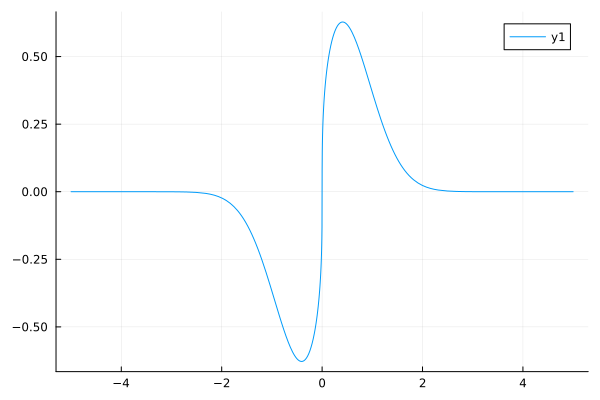

In [61]:
function f(x)
    if ( x < 0.0 )
        - abs( x ) ^ ( 1.0 / 3.0 ) * exp( - x ^ 2 )
    elseif ( x == 0.0 )
        0.0
    else
        abs( x ) ^ ( 1.0 / 3.0 ) * exp( - x ^ 2 )
    end
end

plot(f)

In [62]:
result = newton(f)

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

algorithm loops

##### Steffenson

In [64]:
f(x) = x/(x-1) - 1
result = steffenson(f)
f(result)

-2.5416772276853905e-6

Function is not continous

### Task B - Newton's Ribbon

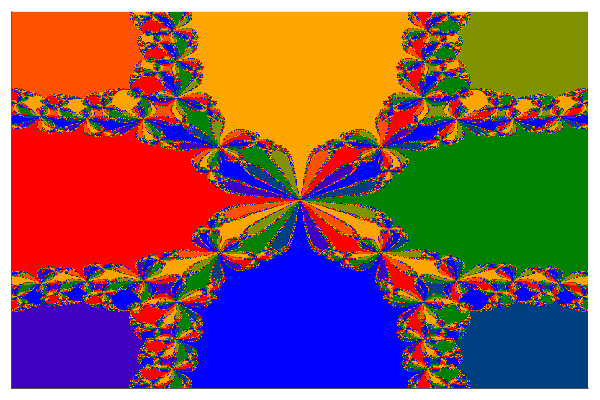

In [5]:
f(x) = x^8 + 15x^4 - 16

function get_map(f)
    @variables x
    Dx = Differential(x)
    map = x - f(x) / Dx(f(x)) |> expand_derivatives
    update_expr = build_function(map, x)
    return eval(update_expr)
end

function applyiteratively(x, update; n=100)
    for i in 1:n
        x = update(x)
    end
    return x
end

update = get_map(f)
lower = -2 - 2im
upper = 2 + 2im
step = 0.5e-2
Z0 = [a+b*im for b in real(lower):step:real(upper), a in imag(lower):step:imag(upper)]
Z100 = applyiteratively.(Z0, update)
heatmap(angle.(Z100), colorbar=false, color=:rainbow, ticks=false)

Newton's Ribbon is a graphical tool used to approximate the roots of a function. Its name derives from Newton's method, the concept upon which this graphical technique is built. 

Newton's Ribbon is a graphical representation of Newton's method in action. To create it, we start by plotting the function $f(x)$. Then, for each point $x$ on the x-axis, we apply Newton's method to find an approximate root, starting from that point as our initial approximation. The line connecting the starting point to subsequent approximations forms a "ribbon," visualizing the iterative approach to the solution. 